

# GUN TRENDS IN THE UNITED STATES



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Gun ownership and the use of firearms has become an ongoing debate in the United States. In the last few years, mass shootings have persuaded people to push for stricter gun laws throughout the country. Between (1999-2016) have background checks for gun registrations decreased or increased? What do the gun trends look like in each state and which ones have the most and least gun registration growth? Finally, are there any factors associated with higher gun registrations per capita based on census data? 

This data will investigate gun registrations using the [U.S. Census Data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv&sa=D&source=editors&ust=1664580025057728&usg=AOvVaw1slpDgPRWt5B4GRqctBk0-) and the [FBI's Gun Data](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx&sa=D&source=editors&ust=1664580025057165&usg=AOvVaw1wWw7yeP4NA3cv1gmxe_k8). The FBI's gun data comes from the National Instant Criminal Background Check System (NICS). Original source can be found on [Github](https://www.google.com/url?q=https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md&sa=D&source=editors&ust=1664580025055946&usg=AOvVaw3kp7EnqBt_l3Xs7U0FvQ1Z).

There are a few limitations to this data. One of the most important limitations to take into consideration is that the data from the NCIS is in regards to the number of background checks initiated and not firearms sold. Some examples of this include, a background check being conducted for a concealed carry permit or a state conducting multiple background checks, over a span of time on a single person, to ensure continued eligibility to conceal carry. The state of Kentucky is known for conducting background checks on a single person, every year, to ensure eligibility to conceal carry. Therefore, no correlation can be made between background checks conducted and firearms sold.

In [1]:
#Packages I used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I have loaded the U.S. Census and FBI data. 

### General Properties

In [2]:
# Loaded Data
census = pd.read_csv('us_census_data.csv')
fbi = pd.read_csv('gun_data.csv')

In [3]:
#To view how many rows and columns are in the dataset
census.shape

(85, 52)

In [4]:
#To view the first 5 rows of data
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [5]:
#To view the last 10 rows of data
census.tail(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Value Flags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,-,Either no or too few sample observations were ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,D,Suppressed to avoid disclosure of confidential...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,F,Fewer than 25 firms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Due to the 'Fact' and 'Fact Note' columns having varied information I decided to view all rows of the data
# in order to have a better understanding of what the data represents
pd.set_option('display.max_rows', None)

In [7]:
census

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


Looking at the data, I found that the 'Fact Note' column is not necessary for this analysis. I also found that the 'Fact' column contains data from 2016 and a few years prior. For this analysis I plan to only use data from 2016. There are also quite a few rows with NaN that are not necessary and can be deleted from the dataframe. 

In [8]:
# To view all column names, non-null counts and datatypes
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

We can see that all 50 states are included in this data and that the data types are all considered objects. This is due to most columns consisting of a mixture of whole numbers or percentages.

In [9]:
#To view how many rows and columns are in the FBI dataset
fbi.shape

(12485, 27)

In [10]:
#To view the first 5 rows of the FBI dataset
fbi.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [11]:
#To view the last 10 rows of the FBI dataset
fbi.tail(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12475,1998-11,Tennessee,0.0,NaN,19.0,85.0,NaN,3,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107
12476,1998-11,Texas,0.0,NaN,1384.0,1349.0,NaN,60,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794
12477,1998-11,Utah,0.0,NaN,98.0,169.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267
12478,1998-11,Vermont,0.0,NaN,23.0,35.0,NaN,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
12479,1998-11,Virgin Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


This shows that the FBI data was recorded from 11/1998 to 09/2017. There are quite a few rows with NaN. For this project, I will drop the rows with NaN values so that I can analyze only the years where all columns were recorded.

In [12]:
fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [13]:
fbi.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


For this data, I will omit the 'permit' and 'permit_recheck' columns due to them not being related to gun registrations.

### Data Cleaning 

In this section, I cleaned the data based on the observations I made in the prior section. I started with the census dataframe before moving onto the FBI dataframe.

In [14]:
#Delete 'Fact Note' column from the Census dataframe
del census['Fact Note']
census

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [15]:
#Dropped all rows containing NaN values from the Data Frame
census_df = census.dropna()
census_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,5.70%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,21.30%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,17.30%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [16]:
#Filtered the dataframe to only include data from the 'Fact' column with the year '2016'.
census_df = census_df[census_df['Fact'].str.contains("2016")]
census_df

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
10,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
12,"White alone, percent, July 1, 2016, (V2016)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,0.50%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%


In row [1] the data consists of the base population for 2010. However, I left it in due to the data being used for differences in base population percentages from 2010 to 2016 in row [2]. The dataframe now consists of population estimates as well as age, gender and race differences in 2016. There are two rows at the bottom of the dataframe comparing "housing units" and "building permits" that are not necessary for this analysis and will be deleted from the dataframe.

In [17]:
#Dropped rows 22 and 29 from the census dataframe consisting of data regarding "housing units" and "building permits"
census_df2 = census_df.drop(labels=[22,29], axis=0)
census_df2

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
10,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
12,"White alone, percent, July 1, 2016, (V2016)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,0.50%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%


The data above consists of rows that contain a mixture of floats and percentages. Due to this, I will convert all percentages into floats to make the data consistant and easier to work with.

In [18]:
#Replaced 'Z' values with 'NaN'
census_df2 = census_df2.replace('Z', np.nan)

In [19]:
#Dropped the first two rows due to them containing integers that would not allow the colums to convert to floats
census_df3 = census_df2.drop(labels=[0,1], axis=0)
census_df3

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
6,"Persons under 18 years, percent, July 1, 2016,...",22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,20.10%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
8,"Persons 65 years and over, percent, July 1, 2...",16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,19.90%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
10,"Female persons, percent, July 1, 2016, (V2016)",51.60%,47.70%,50.30%,50.90%,50.30%,49.70%,51.20%,51.60%,51.10%,...,0.496,0.512,50.40%,49.70%,50.60%,50.80%,50.00%,50.50%,50.30%,48.90%
12,"White alone, percent, July 1, 2016, (V2016)",69.30%,66.10%,83.30%,79.40%,72.70%,87.50%,80.60%,70.10%,77.60%,...,0.852,0.787,79.40%,91.10%,94.60%,70.00%,80.00%,93.60%,87.50%,92.80%
13,"Black or African American alone, percent, July...",26.80%,3.80%,4.90%,15.70%,6.50%,4.50%,11.80%,22.60%,16.80%,...,0.02,0.171,12.60%,1.40%,1.30%,19.80%,4.10%,3.60%,6.60%,1.30%
14,"American Indian and Alaska Native alone, perce...",0.70%,15.20%,5.40%,1.00%,1.70%,1.60%,0.50%,0.60%,0.50%,...,0.09,0.004,1.00%,1.60%,0.40%,0.50%,1.90%,0.20%,1.10%,2.70%
15,"Asian alone, percent, July 1, 2016, (V2016)",1.40%,6.30%,3.40%,1.60%,14.80%,3.30%,4.70%,4.00%,2.90%,...,0.015,0.018,4.80%,2.50%,1.80%,6.60%,8.60%,0.80%,2.80%,1.00%
16,Native Hawaiian and Other Pacific Islander alo...,0.10%,1.30%,0.30%,0.30%,0.50%,0.20%,0.10%,0.10%,0.10%,...,0.001,0.001,0.10%,1.00%,NaN,0.10%,0.80%,NaN,0.10%,0.10%


In [20]:
#Converted the datatype of all rows without percentage signs to floats in census_df3

def conversion_1(x):
    census_df3[(x)] = census_df3[(x)]. astype(float)

conversion_1('New Mexico')
conversion_1('New York')
conversion_1('North Carolina')
conversion_1('North Dakota')
conversion_1('Ohio')
conversion_1('Oklahoma')
conversion_1('Oregon')
conversion_1('Pennsylvania')
conversion_1('Rhode Island')
conversion_1('South Carolina')
conversion_1('South Dakota')
conversion_1('Tennessee')

In [21]:
#Converted the datatype of all rows of columns with percentage signs into floats in census_df3

def conversion_2(x):
    census_df3[(x)] = census_df3[(x)].str.rstrip("%").astype(float)/100

conversion_2('Alabama')
conversion_2('Alaska')
conversion_2('Arizona')
conversion_2('Arkansas')
conversion_2('California')
conversion_2('Colorado')
conversion_2('Connecticut')
conversion_2('Delaware')
conversion_2('Florida')
conversion_2('Georgia')
conversion_2('Hawaii')
conversion_2('Idaho')
conversion_2('Illinois')
conversion_2('Indiana')
conversion_2('Iowa')
conversion_2('Kansas')
conversion_2('Kentucky')
conversion_2('Louisiana')
conversion_2('Maine')
conversion_2('Maryland')
conversion_2('Massachusetts')
conversion_2('Michigan')
conversion_2('Minnesota')
conversion_2('Mississippi')
conversion_2('Missouri')
conversion_2('Montana')
conversion_2('Nebraska')
conversion_2('Nevada')
conversion_2('New Hampshire')
conversion_2('New Jersey')
conversion_2('Texas')
conversion_2('Utah')
conversion_2('Vermont')
conversion_2('Virginia')
conversion_2('Washington')
conversion_2('West Virginia')
conversion_2('Wisconsin')
conversion_2('Wyoming')

In [22]:
#Check to see that all datatypes for the state columns were converted to floats
census_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 2 to 19
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fact            13 non-null     object 
 1   Alabama         13 non-null     float64
 2   Alaska          13 non-null     float64
 3   Arizona         13 non-null     float64
 4   Arkansas        13 non-null     float64
 5   California      13 non-null     float64
 6   Colorado        13 non-null     float64
 7   Connecticut     13 non-null     float64
 8   Delaware        13 non-null     float64
 9   Florida         13 non-null     float64
 10  Georgia         13 non-null     float64
 11  Hawaii          13 non-null     float64
 12  Idaho           13 non-null     float64
 13  Illinois        13 non-null     float64
 14  Indiana         13 non-null     float64
 15  Iowa            13 non-null     float64
 16  Kansas          13 non-null     float64
 17  Kentucky        13 non-null     float

In [23]:
#Created a dataframe with the two rows that were dropped from census_df3
census_df4 = census_df2.query("Fact == 'Population estimates, July 1, 2016,  (V2016)' | Fact == 'Population estimates base, April 1, 2010,  (V2016)'")
census_df4

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [24]:
#Combined the census_df4 and census_df3 back into one dataframe.
census_concat = pd.concat([census_df4, census_df3])
census_concat

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",0.017,0.045,0.084,0.025,0.054,0.102,0.001,0.06,0.096,...,0.063,0.048,0.108,0.104,-0.002,0.051,0.084,-0.012,0.016,0.039
4,"Persons under 5 years, percent, July 1, 2016, ...",0.06,0.073,0.063,0.064,0.063,0.061,0.052,0.058,0.055,...,0.071,0.061,0.072,0.083,0.049,0.061,0.062,0.055,0.058,0.065
6,"Persons under 18 years, percent, July 1, 2016,...",0.226,0.252,0.235,0.236,0.232,0.228,0.211,0.215,0.201,...,0.246,0.226,0.262,0.302,0.19,0.222,0.224,0.205,0.223,0.237
8,"Persons 65 years and over, percent, July 1, 2...",0.161,0.104,0.169,0.163,0.136,0.134,0.161,0.175,0.199,...,0.16,0.157,0.12,0.105,0.181,0.146,0.148,0.188,0.161,0.15
10,"Female persons, percent, July 1, 2016, (V2016)",0.516,0.477,0.503,0.509,0.503,0.497,0.512,0.516,0.511,...,0.496,0.512,0.504,0.497,0.506,0.508,0.5,0.505,0.503,0.489
12,"White alone, percent, July 1, 2016, (V2016)",0.693,0.661,0.833,0.794,0.727,0.875,0.806,0.701,0.776,...,0.852,0.787,0.794,0.911,0.946,0.7,0.8,0.936,0.875,0.928
13,"Black or African American alone, percent, July...",0.268,0.038,0.049,0.157,0.065,0.045,0.118,0.226,0.168,...,0.02,0.171,0.126,0.014,0.013,0.198,0.041,0.036,0.066,0.013
14,"American Indian and Alaska Native alone, perce...",0.007,0.152,0.054,0.01,0.017,0.016,0.005,0.006,0.005,...,0.09,0.004,0.01,0.016,0.004,0.005,0.019,0.002,0.011,0.027


In [25]:
#Renamed ['Fact'] to ['State'] so that when I transpose the data the column name will make more sense.
census_concat.rename(columns = {'Fact':'state'}, inplace = True)

In [26]:
#Tranposed the data so that it is now indexed by State.
census_concat.set_index('state',inplace=True)
census_transpose = census_concat.transpose()
census_transpose

state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)"
Alabama,"4,863,300","4,780,131",0.017,0.06,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658
Alaska,"741,894","710,249",0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.07,0.612
Arizona,"6,931,071","6,392,301",0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555
Arkansas,"2,988,248","2,916,025",0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.01,0.016,0.003,0.02,0.073,0.729
California,"39,250,017","37,254,522",0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377
Colorado,"5,540,545","5,029,324",0.102,0.061,0.228,0.134,0.497,0.875,0.045,0.016,0.033,0.002,0.03,0.213,0.686
Connecticut,"3,576,452","3,574,114",0.001,0.052,0.211,0.161,0.512,0.806,0.118,0.005,0.047,0.001,0.023,0.157,0.677
Delaware,"952,065","897,936",0.06,0.058,0.215,0.175,0.516,0.701,0.226,0.006,0.04,0.001,0.026,0.092,0.629
Florida,"20,612,439","18,804,592",0.096,0.055,0.201,0.199,0.511,0.776,0.168,0.005,0.029,0.001,0.021,0.249,0.549
Georgia,"10,310,371","9,688,680",0.064,0.064,0.244,0.131,0.513,0.612,0.32,0.005,0.041,0.001,0.021,0.094,0.534


In [27]:
#When the data was transposed the datatypes were converted back to 'object'.
   # I converted the appropriate columns back to 'floats'
    
def conversion_tr(x):
    census_transpose[(x)] = census_transpose[(x)].astype(float)

conversion_tr('Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)')
conversion_tr('Persons under 5 years, percent, July 1, 2016,  (V2016)')
conversion_tr('Persons under 18 years, percent, July 1, 2016,  (V2016)')
conversion_tr('Persons 65 years and over, percent,  July 1, 2016,  (V2016)')
conversion_tr('Female persons, percent,  July 1, 2016,  (V2016)')
conversion_tr('White alone, percent, July 1, 2016,  (V2016)')
conversion_tr('Black or African American alone, percent, July 1, 2016,  (V2016)')
conversion_tr('American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)')
conversion_tr('Asian alone, percent, July 1, 2016,  (V2016)')
conversion_tr('Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)')
conversion_tr('Two or More Races, percent, July 1, 2016,  (V2016)')
conversion_tr('Hispanic or Latino, percent, July 1, 2016,  (V2016)')
conversion_tr('White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)')

In [28]:
#Verify that the census dataframe has been cleaned and datatypes converted.
census_transpose.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 15 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Population estimates, July 1, 2016,  (V2016)                                           50 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)                                     50 non-null     object 
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  50 non-null     float64
 3   Persons under 5 years, percent, July 1, 2016,  (V2016)                                 50 non-null     float64
 4   Persons under 18 years, percent, July 1, 2016,  (V2016)                                50 non-null     float64
 5   Persons 65 years and over, percent,  July 1, 2016,  (V2016)               

Now that the census dataframe has been cleaned I will clean the FBI dataframe. I will drop the 'permit' and ''permit recheck' columns from the dataframe. 

In [29]:
#Dropped 'permit' and 'permit_recheck' columns from the dataframe.
fbi.drop(['permit', 'permit_recheck'], axis=1, inplace=True)

In [30]:
# Updated the 'month' column to a datetime format
fbi['month'] = pd.to_datetime(fbi['month'], format='%Y-%m')
fbi.head()

,month,state,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [31]:
#Saved the clean data frame
fbi_clean = fbi
fbi_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      12485 non-null  datetime64[ns]
 1   state                      12485 non-null  object        
 2   handgun                    12465 non-null  float64       
 3   long_gun                   12466 non-null  float64       
 4   other                      5500 non-null   float64       
 5   multiple                   12485 non-null  int64         
 6   admin                      12462 non-null  float64       
 7   prepawn_handgun            10542 non-null  float64       
 8   prepawn_long_gun           10540 non-null  float64       
 9   prepawn_other              5115 non-null   float64       
 10  redemption_handgun         10545 non-null  float64       
 11  redemption_long_gun        10544 non-null  float64       
 12  rede

<a id='eda'></a>
## Exploratory Data Analysis


### Between the years (1999-2016), have background checks for gun registrations increased or decreased?

In [32]:
#Added a column to the dataframe with just the year for each row. 
fbi_clean['year'] = pd.to_datetime(fbi_clean['month']).dt.year
fbi_clean.head()

,month,state,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,2017-09-01,Alabama,5734.0,6320.0,221.0,317,0.0,15.0,21.0,2.0,...,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017
1,2017-09-01,Alaska,2320.0,2930.0,219.0,160,0.0,5.0,2.0,0.0,...,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017
2,2017-09-01,Arizona,11063.0,7946.0,920.0,631,0.0,13.0,6.0,0.0,...,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017
3,2017-09-01,Arkansas,4347.0,6063.0,165.0,366,51.0,12.0,13.0,0.0,...,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017
4,2017-09-01,California,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017


Adding the "year" column to the data frame allowed me to view the data by year instead of by month. Ultimately making it easier to analyze the total number of background checks completed per year, as shown below.

In [33]:
# New df without "Mariana Islands","Virgin Islands","Guam","Puerto Rico" or "District of Columbia" in the [State] column.
fbi_clean = fbi_clean[fbi_clean["state"].str.contains("Mariana Islands|Virgin Islands|Guam|Puerto Rico|District of Columbia") == False]

After reviewing the data in the ['state'] column, I decided to drop all rows not considered to be States. This includes "Mariana Islands", "Virgin Islands", "Guam", "Puerto Rico" and "District of Columbia".

In [34]:
#Created a dataframe with the total number of background checks completed and grouped it by state and year.
state_df = fbi_clean.groupby(["state", "year"])["totals"].sum().reset_index(name ='totals')
state_df

,state,year,totals
0,Alabama,1998,36568
1,Alabama,1999,246756
2,Alabama,2000,221911
3,Alabama,2001,230187
4,Alabama,2002,221008
5,Alabama,2003,225479
6,Alabama,2004,229997
7,Alabama,2005,235873
8,Alabama,2006,243176
9,Alabama,2007,245355


When I attempted to find the state with the least amount of background checks in a specific year, the output consisted of a few states with 0 for their totals. Due to this I dropped all rows with zeros.

In [35]:
# New df without zero's in 'totals' column
state_df2 =state_df[state_df['totals'] !=0]

It should be noted that data collection started in 11/1998 and ended 09/2017. This means only two months were recorded in 1998 and 4 months out of the year were not recorded in 2017. The data for the years 1998 and 2017 are not completely accurate for the number of background checks completed in those years. Due to this, I dropped the years 1997 and 2017 from the data frame.

In [36]:
#Created a dataframe without the years 1998 and 2017.
mask = state_df2['year'].isin([1998, 2017])
state_df3 = state_df2[~mask]
state_df3

,state,year,totals
1,Alabama,1999,246756
2,Alabama,2000,221911
3,Alabama,2001,230187
4,Alabama,2002,221008
5,Alabama,2003,225479
6,Alabama,2004,229997
7,Alabama,2005,235873
8,Alabama,2006,243176
9,Alabama,2007,245355
10,Alabama,2008,299432


In [37]:
#Created a datafame with the total number of background checks completed but grouped only by year.
year_df = state_df3.groupby(["year"])["totals"].sum().reset_index(name = 'totals')
year_df

,year,totals
0,1999,9038315
1,2000,8421486
2,2001,8812457
3,2002,8358574
4,2003,8393942
5,2004,8571726
6,2005,8857599
7,2006,9982755
8,2007,11151998
9,2008,12684240


Text(0.5, 1.0, 'Total # of Background Checks Completed in the U.S. (1999-2016)')

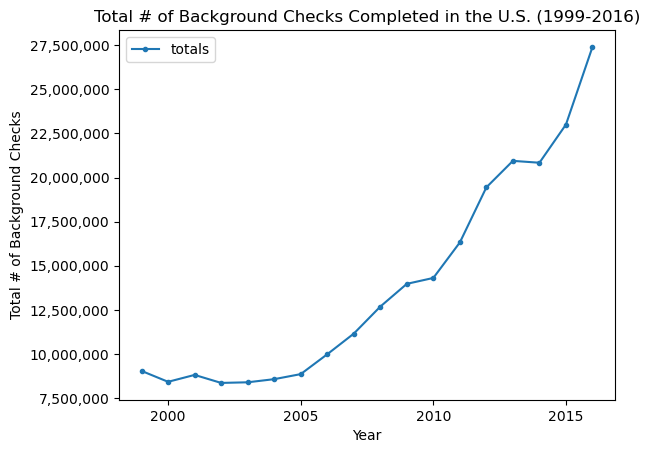

In [38]:
#Created line graph showing the increase in background checks completed between (1999-2016)
ax=year_df.plot(x='year', y='totals', kind='line', marker='.')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.locator_params(integer=True)

plt.xlabel("Year")
plt.ylabel("Total # of Background Checks")
plt.title("Total # of Background Checks Completed in the U.S. (1999-2016)")

As shown in the graph, there has been a major increase in background checks completed between (1999-2016). The drastic increase appears to start around 2005.

In [39]:
#Created dataframe to view the average amount of background checks completed for all states grouped by year.
avg_df = state_df3.groupby(["year"])["totals"].mean().reset_index(name = 'average')
avg_df

,year,average
0,1999,180766.30
1,2000,168429.72
2,2001,176249.14
3,2002,167171.48
4,2003,167878.84
5,2004,171434.52
6,2005,177151.98
7,2006,199655.10
8,2007,223039.96
9,2008,253684.80


Text(0.5, 1.0, 'Average # of Background Checks Completed in the U.S. (1999-2016)')

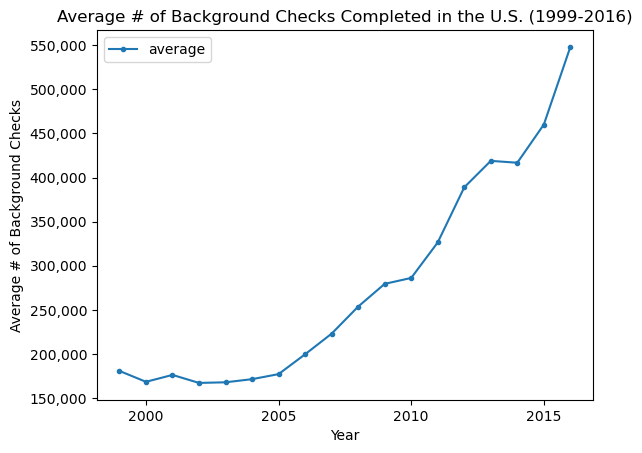

In [40]:
ax=avg_df.plot(x='year', y='average', kind='line',  marker='.')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.locator_params(integer=True)

plt.xlabel("Year")
plt.ylabel("Average # of Background Checks")
plt.title("Average # of Background Checks Completed in the U.S. (1999-2016)")

### Which states have the least and most gun registration growth? 

In [41]:
# State with the least amount of gun registrations.
state_df3[state_df3.totals == state_df3.totals.min()]

,state,year,totals
201,Hawaii,1999,5343


In [42]:
#States with the least amount of gun registrations, ordered by year.
state_df3.loc[state_df3.groupby('year')['totals'].idxmin()]

,state,year,totals
201,Hawaii,1999,5343
202,Hawaii,2000,6609
203,Hawaii,2001,7464
204,Hawaii,2002,7807
205,Hawaii,2003,7439
206,Hawaii,2004,7298
207,Hawaii,2005,7575
208,Hawaii,2006,7588
209,Hawaii,2007,6521
210,Hawaii,2008,8569


In [43]:
#State with the most background checks completed for gun registrations.
state_df3[state_df3.totals == state_df3.totals.max()]

,state,year,totals
338,Kentucky,2016,3676847


In [44]:
#States with the most background checks completed for gun registrations, ordered by year.
state_df3.loc[state_df3.groupby('year')['totals'].idxmax()]

,state,year,totals
81,California,1999,883144
82,California,2000,794506
83,California,2001,854569
84,California,2002,684390
845,Texas,2003,688275
846,Texas,2004,672995
847,Texas,2005,738793
328,Kentucky,2006,791599
329,Kentucky,2007,1587850
330,Kentucky,2008,1881101


Hawaii has consistently had the least amount of total gun registrations per year. The state with the most gun registrations has varied by year, however, Kentucky has had the most total gun registrations between 1999-2016 overall.

In [45]:
#Created dataframe where [first] = totals for 1999 and [last] = totals for 2016
state_diff = state_df3.groupby(by='state')['totals']\
                                 .agg(['first','last'])
state_diff

,first,last
state,,
Alabama,246756,616947
Alaska,43073,87647
Arizona,173548,416279
Arkansas,184616,266014
California,883144,2377167
Colorado,257308,540514
Connecticut,87209,317692
Delaware,17594,59430
Florida,279700,1435340


In [46]:
#Changed Column titles to show the years the data represents.
state_diff.rename(columns = {'first':'1999', 'last':'2016'}, inplace = True)

In [47]:
#Added ['difference'] column to the dataframe to show the difference between the number of 
    #background checks completed from 1999-2016 per state.
state_diff['difference'] = state_diff['2016'] - state_diff['1999']
state_diff

,1999,2016,difference
state,,,
Alabama,246756,616947,370191
Alaska,43073,87647,44574
Arizona,173548,416279,242731
Arkansas,184616,266014,81398
California,883144,2377167,1494023
Colorado,257308,540514,283206
Connecticut,87209,317692,230483
Delaware,17594,59430,41836
Florida,279700,1435340,1155640


In [48]:
#Added ['percentage'] column to the dataframe to show the percent increase in background checks.
state_diff['percentage'] = (state_diff['2016'] - state_diff['1999']) / state_diff['2016']
state_diff

,1999,2016,difference,percentage
state,,,,
Alabama,246756,616947,370191,0.600037
Alaska,43073,87647,44574,0.508563
Arizona,173548,416279,242731,0.583097
Arkansas,184616,266014,81398,0.305991
California,883144,2377167,1494023,0.628489
Colorado,257308,540514,283206,0.523957
Connecticut,87209,317692,230483,0.725492
Delaware,17594,59430,41836,0.703954
Florida,279700,1435340,1155640,0.805133


In [49]:
#Converted ['percentage'] column into percentages
state_diff2 = state_diff.style.format({
    'percentage':"{:,.2%}".format,
    })

In [50]:
#Sorted the dataframe to show the smallest to largest differences in background checks from (1999-2016) per state.
state_sorted = state_diff.sort_values(by=['difference'])
state_sorted

,1999,2016,difference,percentage
state,,,,
Hawaii,5343,16681,11338,0.679695
Rhode Island,10677,27758,17081,0.615354
Vermont,22218,39417,17199,0.436335
Wyoming,35476,63594,28118,0.442149
Nebraska,47959,88663,40704,0.459087
Delaware,17594,59430,41836,0.703954
North Dakota,29864,72036,42172,0.585430
Alaska,43073,87647,44574,0.508563
Montana,73027,136337,63310,0.464364


In [51]:
#Sorted the dataframe to show the smallest to largest percent increase of background checks from (1999-2016) per state.
state_sorted2 = state_diff.sort_values(by=['percentage'])
state_sorted2

,1999,2016,difference,percentage
state,,,,
Arkansas,184616,266014,81398,0.305991
Georgia,409810,612985,203175,0.331452
Mississippi,182114,276161,94047,0.340551
New Mexico,94406,161216,66810,0.414413
Vermont,22218,39417,17199,0.436335
Wyoming,35476,63594,28118,0.442149
West Virginia,134471,242350,107879,0.445137
Maryland,91381,165367,73986,0.447405
Nebraska,47959,88663,40704,0.459087


The state_sorted dataframe shows that between the years 1999 to 2016, Hawaii had the least total number of gun registrations and Kentucky has had the most. However, when you look at the state_sorted2 dataframe it shows that Arkansas had the least overall percent growth of gun registrations between 1999-2016. Kentucky still had the most overall percent growth. 

### Are there factors associated with higher gun registrations per capita based on census data?

In [52]:
#Joined the 'state_diff' and 'census_transpose' dataframes
df_joined = state_diff.join(census_transpose)
df_joined

,1999,2016,difference,percentage,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)"
state,,,,,,,,,,,,,,,,,,,
Alabama,246756,616947,370191,0.600037,"4,863,300","4,780,131",0.017,0.060,0.226,0.161,0.516,0.693,0.268,0.007,0.014,0.001,0.016,0.042,0.658
Alaska,43073,87647,44574,0.508563,"741,894","710,249",0.045,0.073,0.252,0.104,0.477,0.661,0.038,0.152,0.063,0.013,0.073,0.070,0.612
Arizona,173548,416279,242731,0.583097,"6,931,071","6,392,301",0.084,0.063,0.235,0.169,0.503,0.833,0.049,0.054,0.034,0.003,0.028,0.309,0.555
Arkansas,184616,266014,81398,0.305991,"2,988,248","2,916,025",0.025,0.064,0.236,0.163,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729
California,883144,2377167,1494023,0.628489,"39,250,017","37,254,522",0.054,0.063,0.232,0.136,0.503,0.727,0.065,0.017,0.148,0.005,0.038,0.389,0.377
Colorado,257308,540514,283206,0.523957,"5,540,545","5,029,324",0.102,0.061,0.228,0.134,0.497,0.875,0.045,0.016,0.033,0.002,0.030,0.213,0.686
Connecticut,87209,317692,230483,0.725492,"3,576,452","3,574,114",0.001,0.052,0.211,0.161,0.512,0.806,0.118,0.005,0.047,0.001,0.023,0.157,0.677
Delaware,17594,59430,41836,0.703954,"952,065","897,936",0.060,0.058,0.215,0.175,0.516,0.701,0.226,0.006,0.040,0.001,0.026,0.092,0.629
Florida,279700,1435340,1155640,0.805133,"20,612,439","18,804,592",0.096,0.055,0.201,0.199,0.511,0.776,0.168,0.005,0.029,0.001,0.021,0.249,0.549


After joining the two dataframes, I decided to reset the index to make the dataframe easier to work with as well as easier to read. I also decided to drop the ['1999', '2016', 'Persons under 5 years, percent, July 1, 2016,  (V2016)', 'Persons under 18 years, percent, July 1, 2016,  (V2016)', 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)'] columns from the dataframe. 

The ['1999'] and ['2016'] columns are not necessary for this analysis and neither are the differences in age groups that are represented in the other three columns.

In [53]:
#Reset index of the dataframe
df_joined.reset_index(inplace = True)

In [54]:
#Dropped columns from joined dataframe.
df_joined2 = df_joined.drop(columns = ['1999', '2016', 'Persons under 5 years, percent, July 1, 2016,  (V2016)', 'Persons under 18 years, percent, July 1, 2016,  (V2016)', 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)'], axis=1)

In order to understand a few of the race demographics better, I created three histograms comparing the columns ['white alone'], ['hispanic or latino'] and ['Black or African American']. I chose these three races due to them being the top three. It should also be noted that this data is for the year 2016 only.

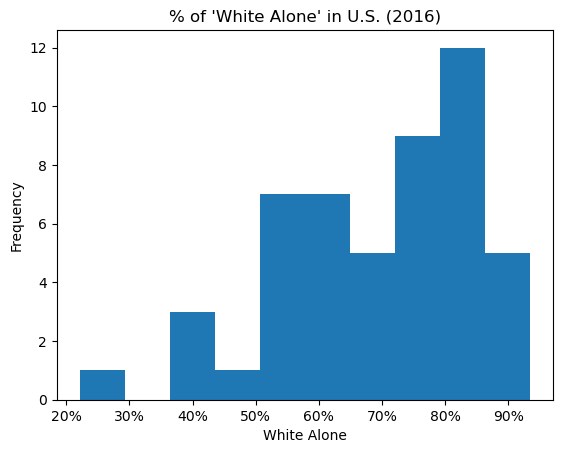

In [55]:
#Imported matplotlib ticker
import matplotlib.ticker as ticker

#Created Histogram showing the % of 'White alone' Individuals in the U.S. in 2016
ax = df_joined2['White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)'].plot.hist()

#Changed x axis to include percentage signs
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

plt.xlabel("White Alone")
plt.title("% of 'White Alone' in U.S. (2016)")

plt.show()

This histogram shows that the percent of 'White alone', in the U.S., in 2016 is left skewed. Ultimately, this means that a larger number of states had a higher percentage of individuals considered 'White alone'.

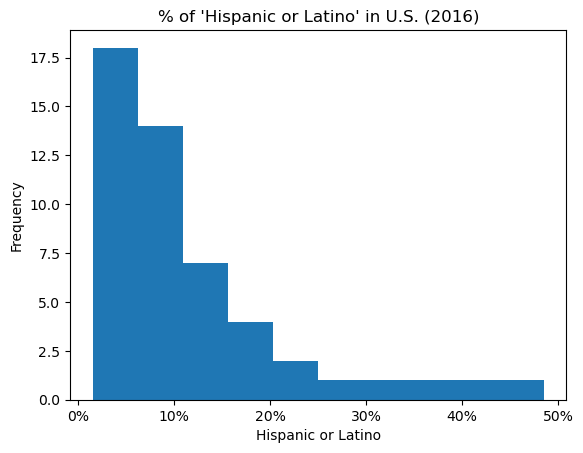

In [56]:
#Created Histogram showing the % of 'Hispanic or Latino' Individuals in the U.S. in 2016
ax = df_joined2['Hispanic or Latino, percent, July 1, 2016,  (V2016)'].plot.hist()

#Changed x axis to include percentage signs
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

plt.xlabel("Hispanic or Latino")
plt.title("% of 'Hispanic or Latino' in U.S. (2016)")

plt.show()

This histogram shows that the percent of 'Hispanic or Latino', in the U.S., in 2016 is right skewed. Ultimately, this means that a larger number of states had a lower percentage of individuals considered 'Hispanic or Latino'.

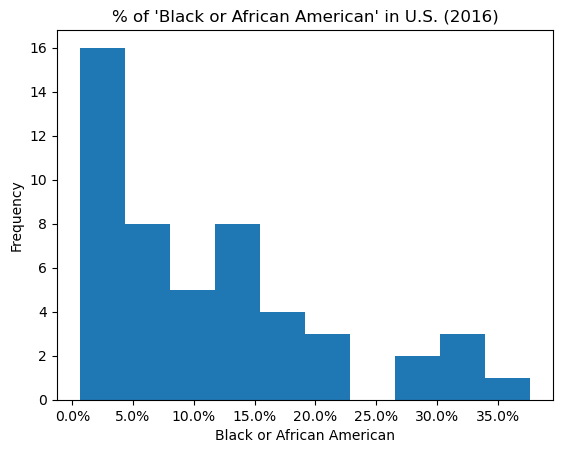

In [57]:
#Created Histogram showing the % of 'Black or African American' Individuals in the U.S. in 2016
ax = df_joined2['Black or African American alone, percent, July 1, 2016,  (V2016)'].plot.hist()

#Changed x axis to include percentage signs
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

plt.xlabel("Black or African American")
plt.title("% of 'Black or African American' in U.S. (2016)")

plt.show()

This histogram shows that the percent of 'Black or African American', in the U.S., in 2016 is also right skewed. Similarly to the 'Hispanic or Latino' histogram,  a larger number of states had a lower percentage of individuals considered 'Black or African American'.

In [58]:
#Sorted the joined dataframe by the ['percentage'] column
df_join_sorted = df_joined2.sort_values(by=['percentage'])
df_join_sorted

,state,difference,percentage,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)"
3,Arkansas,81398,0.305991,"2,988,248","2,916,025",0.025,0.509,0.794,0.157,0.010,0.016,0.003,0.020,0.073,0.729
9,Georgia,203175,0.331452,"10,310,371","9,688,680",0.064,0.513,0.612,0.320,0.005,0.041,0.001,0.021,0.094,0.534
23,Mississippi,94047,0.340551,"2,988,726","2,968,103",0.007,0.515,0.593,0.377,0.006,0.011,0.001,0.012,0.031,0.569
30,New Mexico,66810,0.414413,2081015,2059198,0.011,0.505,0.826,0.025,0.106,0.017,0.002,0.025,0.485,0.381
44,Vermont,17199,0.436335,"624,594","625,741",-0.002,0.506,0.946,0.013,0.004,0.018,NaN,0.019,0.019,0.931
49,Wyoming,28118,0.442149,"585,501","563,767",0.039,0.489,0.928,0.013,0.027,0.010,0.001,0.021,0.100,0.841
47,West Virginia,107879,0.445137,"1,831,102","1,853,011",-0.012,0.505,0.936,0.036,0.002,0.008,NaN,0.017,0.015,0.923
19,Maryland,73986,0.447405,"6,016,447","5,773,786",0.042,0.516,0.593,0.307,0.006,0.066,0.001,0.028,0.098,0.515
26,Nebraska,40704,0.459087,"1,907,116","1,826,334",0.044,0.502,0.889,0.050,0.014,0.025,0.001,0.021,0.107,0.796
15,Kansas,90440,0.460142,"2,907,289","2,853,129",0.019,0.502,0.866,0.062,0.012,0.030,0.001,0.029,0.116,0.763


In [59]:
#Sorted df_joined2 by the ['Population, percent change...'] column
df_join_sorted1 = df_joined2.sort_values(by=['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)'])
df_join_sorted1

,state,difference,percentage,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","White alone, percent, July 1, 2016, (V2016)","Black or African American alone, percent, July 1, 2016, (V2016)","American Indian and Alaska Native alone, percent, July 1, 2016, (V2016)","Asian alone, percent, July 1, 2016, (V2016)","Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016, (V2016)","Two or More Races, percent, July 1, 2016, (V2016)","Hispanic or Latino, percent, July 1, 2016, (V2016)","White alone, not Hispanic or Latino, percent, July 1, 2016, (V2016)"
47,West Virginia,107879,0.445137,"1,831,102","1,853,011",-0.012,0.505,0.936,0.036,0.002,0.008,NaN,0.017,0.015,0.923
44,Vermont,17199,0.436335,"624,594","625,741",-0.002,0.506,0.946,0.013,0.004,0.018,NaN,0.019,0.019,0.931
12,Illinois,1439222,0.748009,"12,801,539","12,831,574",-0.002,0.509,0.772,0.147,0.006,0.055,0.001,0.019,0.170,0.617
6,Connecticut,230483,0.725492,"3,576,452","3,574,114",0.001,0.512,0.806,0.118,0.005,0.047,0.001,0.023,0.157,0.677
18,Maine,64422,0.577351,"1,331,479","1,328,364",0.002,0.510,0.948,0.015,0.007,0.012,NaN,0.017,0.016,0.935
38,Rhode Island,17081,0.615354,1056426,1052940,0.003,0.514,0.844,0.081,0.010,0.036,0.002,0.027,0.149,0.733
21,Michigan,271836,0.469002,"9,928,300","9,884,129",0.004,0.508,0.796,0.142,0.007,0.031,NaN,0.024,0.050,0.754
37,Pennsylvania,601665,0.526290,12784227,12702857,0.006,0.510,0.824,0.118,0.004,0.035,0.001,0.019,0.070,0.770
23,Mississippi,94047,0.340551,"2,988,726","2,968,103",0.007,0.515,0.593,0.377,0.006,0.011,0.001,0.012,0.031,0.569
34,Ohio,578127,0.660170,11614373,11536727,0.007,0.510,0.825,0.128,0.003,0.022,0.001,0.022,0.037,0.795


I sorted the df_joined2 first by the ['Percentage'] column and then by the ['Population percent change'] column. This allowed me to see the percent growth of gun registrations per state from lowest to highest along with the other columns regarding census information in the first sorted dataframe. 

In the second sorted dataframe, I can compare population percent growth with the other columns regarding census information. Looking at the dataframes, there does not seem to be any correlation between gun registration growth and either population percent growth or race demographics. 

To verify this, I created 4 scatter plots comparing 'Gun Registration Growth' to 'Population Growth', 'White only (not Hispanic or Latino)', 'Hispanic or Latino', and 'Black or African American'. These scatter plots affirmed that there is no correlation between gun registration growth and either population or race demographics.

In [60]:
#Imported scipy.stats to perform linear regression on Gun Registration Growth compared to Population Growth
import scipy.stats

x_pop = df_join_sorted['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']
y_pop = df_join_sorted['percentage']

result_pop_growth = scipy.stats.linregress(x_pop, y_pop)

result_pop_growth.rvalue, result_pop_growth.pvalue

(0.09714446046058117, 0.5021370362706936)

According to Pearson's Correlation Coefficient, since r = 0.0971 there is no correlation between Gun Registration Growth and Population Growth. It is also not statistically significant due to the p-value > .05 

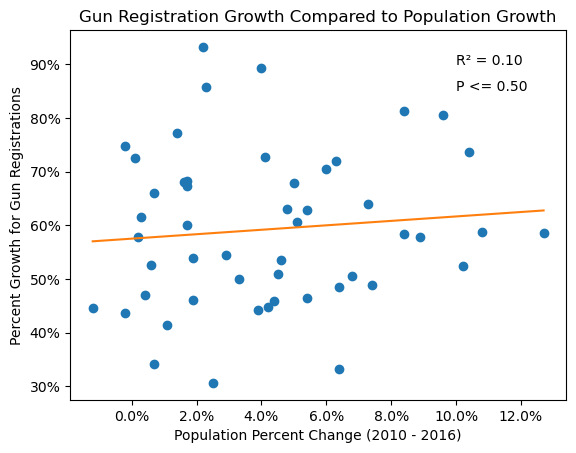

In [61]:
#Sort values in the ['Population, percent change..'] column
df_join_sorted.sort_values('Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Define tick spaces
fig, ax = plt.subplots(1,1)
#Change x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.1, 0.9, 'R\u00B2 = %0.2f' % result_pop_growth.rvalue)
plt.text(0.1, 0.85, 'P <= %0.2f' % result_pop_growth.pvalue)
plt.xlabel("Population Percent Change (2010 - 2016)")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to Population Growth")

plt.show()

In [62]:
#Imported scipy.stats to perform linear regression on Gun Registration Growth compared to 'White Alone'
import scipy.stats

x_white = df_join_sorted['White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']
y_white = df_join_sorted['percentage']

result_white = scipy.stats.linregress(x_white, y_white)

result_white.rvalue, result_white.pvalue

(0.07503079161729245, 0.6045561724231201)

According to Pearson's Correlation Coefficient, since r = 0.0750 there is no correlation between Gun Registration Growth and the 'White Alone' Demographic. It is also not statistically significant due to the p-value > .05

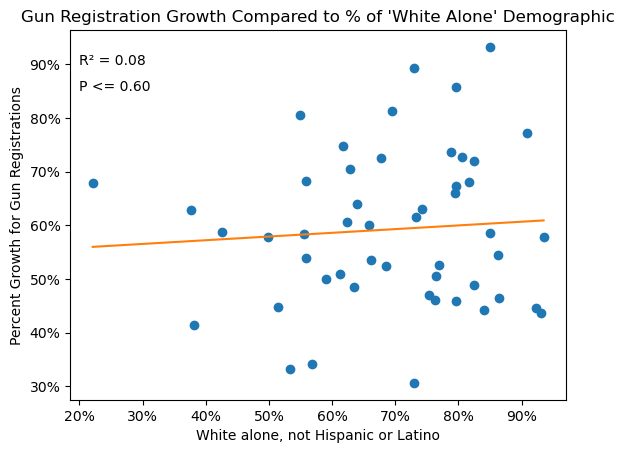

In [77]:
#Sorted values in the ['White alone, not Hispanic or Latino...'] columns
df_join_sorted.sort_values('White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Define tick spaces
fig, ax = plt.subplots(1,1)

#Change x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.2, 0.9, 'R\u00B2 = %0.2f' % result_white.rvalue)
plt.text(0.2, 0.85, 'P <= %0.2f' % result_white.pvalue)
plt.xlabel("White alone, not Hispanic or Latino")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to % of 'White Alone' Demographic")

plt.show()

In [78]:
#Imported scipy.stats to perform linear regression on Gun Registration Growth compared to 'Hispanic or Latino'
import scipy.stats

x_hispanic = df_join_sorted['Hispanic or Latino, percent, July 1, 2016,  (V2016)']
y_hispanic = df_join_sorted['percentage']

result_hispanic = scipy.stats.linregress(x_hispanic, y_hispanic)

result_hispanic.rvalue, result_hispanic.pvalue

(-0.0032383241948880947, 0.9821932647207419)

According to Pearson's Correlation Coefficient, since r = -0.0032 there is no correlation between Gun Registration Growth and the 'Hispanic or Latino' Demographic. It is also not statistically significant due to the p-value > .05

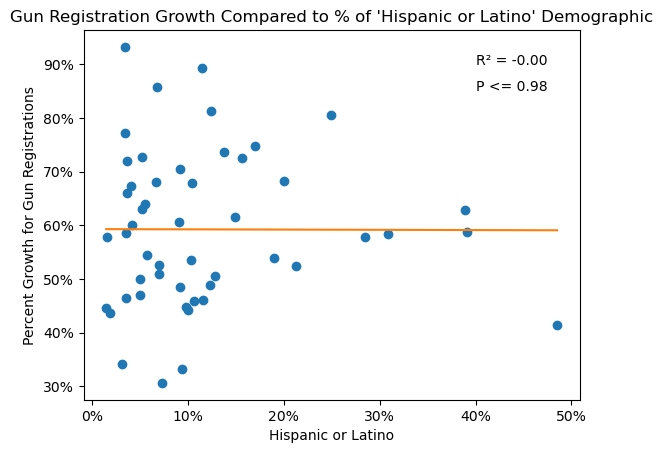

In [83]:
#Sorted values in the ['Hispanic or Latino...'] columns
df_join_sorted.sort_values('Hispanic or Latino, percent, July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['Hispanic or Latino, percent, July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Defined tick spaces
fig, ax = plt.subplots(1,1)

#Changed x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.4, 0.9, 'R\u00B2 = %0.2f' % result_hispanic.rvalue)
plt.text(0.4, 0.85, 'P <= %0.2f' % result_hispanic.pvalue)
plt.xlabel("Hispanic or Latino")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to % of 'Hispanic or Latino' Demographic")

plt.show()

In [86]:
#Imported scipy.stats to perform linear regression on Gun Registration Growth compared to 'Black or African American'
import scipy.stats

x_black = df_join_sorted['Black or African American alone, percent, July 1, 2016,  (V2016)']
y_black = df_join_sorted['percentage']

result_black = scipy.stats.linregress(x_black, y_black)

result_black.rvalue, result_black.pvalue

(-0.19374440284602293, 0.1776123393266531)

According to Pearson's Correlation Coefficient, since r = -0.1937 there is no correlation between Gun Registration Growth and the 'Black or African American' Demographic. It is also not statistically significant due to the p-value > .05

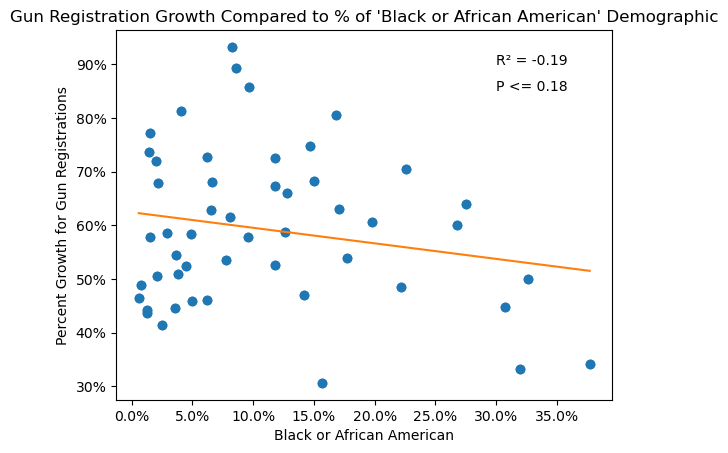

In [88]:
#Sorted values in the ['Black or African American alone ...'] columns
df_join_sorted.sort_values('Black or African American alone, percent, July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['Black or African American alone, percent, July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Defined tick spaces
fig, ax = plt.subplots(1,1)
plt.scatter(df_join_sorted['Black or African American alone, percent, July 1, 2016,  (V2016)'],df_join_sorted['percentage'])

#Changed x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.3, 0.9, 'R\u00B2 = %0.2f' % result_black.rvalue)
plt.text(0.3, 0.85, 'P <= %0.2f' % result_black.pvalue)
plt.xlabel("Black or African American")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to % of 'Black or African American' Demographic")

plt.show()

In [94]:
#Import tabulate to create a table representing correlation coefficients and p-values
    # for demographics compared to Gun Registration Growth
from tabulate import tabulate

table = [['Demographic', 'R2', 'p-value'],
        ['Total Population', .10, .50],
        ['White Alone', .08, .60],
        ['Hispanic or Latino', -0.00, 0.98],
        ['Black or African American', -0.19, 0.18]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════╤═══════╤═══════════╕
│ Demographic               │    R2 │   p-value │
╞═══════════════════════════╪═══════╪═══════════╡
│ Total Population          │  0.1  │      0.5  │
├───────────────────────────┼───────┼───────────┤
│ White Alone               │  0.08 │      0.6  │
├───────────────────────────┼───────┼───────────┤
│ Hispanic or Latino        │ -0    │      0.98 │
├───────────────────────────┼───────┼───────────┤
│ Black or African American │ -0.19 │      0.18 │
╘═══════════════════════════╧═══════╧═══════════╛


Above is an overview of the correlation coefficients and p-values for the different demographics that were compared to Gun Registration Growth. As shown in the scatter plots, there are no correlations between any of the demographics and Gun Registration Growth.

<a id='conclusions'></a>
# Conclusions


In conclusion, I investigated three questions regarding gun trends in the U.S. between the years (1999-2016). These three questions consisted of:

   *1.) Between the years (1999-2016), have background checks for gun registrations increased or decreased?*

   *2.) Which states have the most and least gun registration growth?*

   *3.) Are there any factors associated with higher gun registrations per capita based on census data?*

### Between the years (1999-2016), have background checks for gun registrations increased or decreased.

Overall, there has been a significant increase in gun registration growth in the U.S. between (1999-2016). In 1999, there was a total of 9,038,315 background checks completed for gun registrations compared to 2016 with a total of 27,405,549 background checks completed.

This increase is shown in the dataframe and line graph below:

In [66]:
#Created a datafame with the total number of background checks completed but grouped only by year.
year_df = state_df3.groupby(["year"])["totals"].sum().reset_index(name = 'totals')
year_df

,year,totals
0,1999,9038315
1,2000,8421486
2,2001,8812457
3,2002,8358574
4,2003,8393942
5,2004,8571726
6,2005,8857599
7,2006,9982755
8,2007,11151998
9,2008,12684240


Text(0.5, 1.0, 'Total # of Background Checks Completed in the U.S. (1999-2016)')

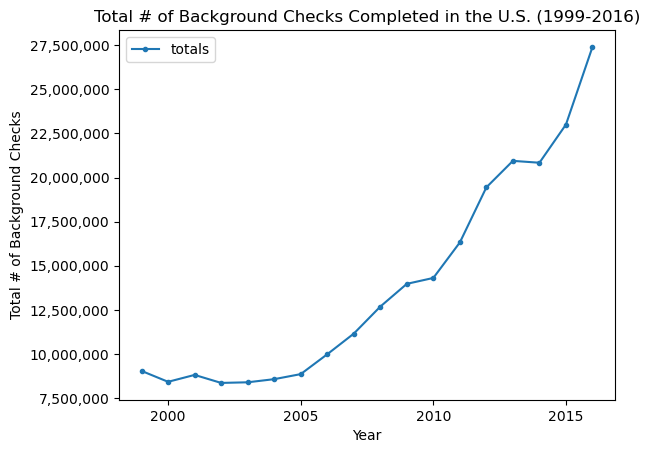

In [67]:
ax=year_df.plot(x='year', y='totals', kind='line', marker='.')
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax.locator_params(integer=True)

plt.xlabel("Year")
plt.ylabel("Total # of Background Checks")
plt.title("Total # of Background Checks Completed in the U.S. (1999-2016)")

### Which states have the most and least gun registration growth?

First, I found the states with the least and most amount of total background checks completed. Hawaii has consistently had the least amount of total gun registrations per year. The state with the most gun registrations has varied by year, however, Kentucky has had the most total gun registrations between 1999-2016 overall.

**It should be noted, one of the limitations was that Kentucky is a state known for conducting background checks on a single person, every year, to ensure eligibility to conceal carry. This could be a reason why they have some of the highest background checks completed for gun registrations per year.**

Next, I found the difference in total # of background checks completed for each state in the years 1999 and 2016. I sorted the dataframe by the ['difference'] column for each state. This dataframe shows that Hawaii had the lowest difference at a total of 11,338 while Kentucky had the highest at 3,428,635.

Finally, I got the percent increase for each state between the years 1999 and 2016 and sorted the dataframe by the ['percentage'] column. This dataframe shows that Arkansas had the least gun registration growth at about 31% and Kentucky had the most at about 93%.


In [68]:
#States with the least amount of gun registrations, ordered by year.
state_df3.loc[state_df3.groupby('year')['totals'].idxmin()]

,state,year,totals
201,Hawaii,1999,5343
202,Hawaii,2000,6609
203,Hawaii,2001,7464
204,Hawaii,2002,7807
205,Hawaii,2003,7439
206,Hawaii,2004,7298
207,Hawaii,2005,7575
208,Hawaii,2006,7588
209,Hawaii,2007,6521
210,Hawaii,2008,8569


In [69]:
#States with the most background checks completed for gun registrations, ordered by year.
state_df3.loc[state_df3.groupby('year')['totals'].idxmax()]

,state,year,totals
81,California,1999,883144
82,California,2000,794506
83,California,2001,854569
84,California,2002,684390
845,Texas,2003,688275
846,Texas,2004,672995
847,Texas,2005,738793
328,Kentucky,2006,791599
329,Kentucky,2007,1587850
330,Kentucky,2008,1881101


In [70]:
#Sorted the dataframe by the ['difference'} column 
    # to show the smallest to largest increase in number of background checks by state from 1999-2016
state_sorted = state_diff.sort_values(by=['difference'])
state_sorted

,1999,2016,difference,percentage
state,,,,
Hawaii,5343,16681,11338,0.679695
Rhode Island,10677,27758,17081,0.615354
Vermont,22218,39417,17199,0.436335
Wyoming,35476,63594,28118,0.442149
Nebraska,47959,88663,40704,0.459087
Delaware,17594,59430,41836,0.703954
North Dakota,29864,72036,42172,0.585430
Alaska,43073,87647,44574,0.508563
Montana,73027,136337,63310,0.464364


In [71]:
#Sorted the dataframe by the ['percentage'] column
    #to show the smallest to largest percent increase of background checks by state from 1999-2016
state_sorted2 = state_diff.sort_values(by=['percentage'])
state_sorted2

,1999,2016,difference,percentage
state,,,,
Arkansas,184616,266014,81398,0.305991
Georgia,409810,612985,203175,0.331452
Mississippi,182114,276161,94047,0.340551
New Mexico,94406,161216,66810,0.414413
Vermont,22218,39417,17199,0.436335
Wyoming,35476,63594,28118,0.442149
West Virginia,134471,242350,107879,0.445137
Maryland,91381,165367,73986,0.447405
Nebraska,47959,88663,40704,0.459087


### Are there any factors associated with higher gun registrations per capita based on census data?



 I joined the FBI and Census dataframes together in an effort to find any correlations between gun registration growth and either population growth or race demographics per state.
 
I conducted statistical analysis to obtain Pearson's correlation coefficients and p-values for 'Gun Registration Growth' compared to 'Population Growth', 'White only (not Hispanic or Latino)', Hispanic or Latino', and 'Black or African American' demographics.

Below is a table overview of those correlation coefficients and p-values. 

In [101]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════════════╤═══════╤═══════════╕
│ Demographic               │    R2 │   p-value │
╞═══════════════════════════╪═══════╪═══════════╡
│ Total Population          │  0.1  │      0.5  │
├───────────────────────────┼───────┼───────────┤
│ White Alone               │  0.08 │      0.6  │
├───────────────────────────┼───────┼───────────┤
│ Hispanic or Latino        │ -0    │      0.98 │
├───────────────────────────┼───────┼───────────┤
│ Black or African American │ -0.19 │      0.18 │
╘═══════════════════════════╧═══════╧═══════════╛


As shown in the table, there are no correlations between gun registration growth and either population growth or race demographics. 

The scatter plots below, also affirm that there is no correlation between gun registration growth and either population or race demographics.

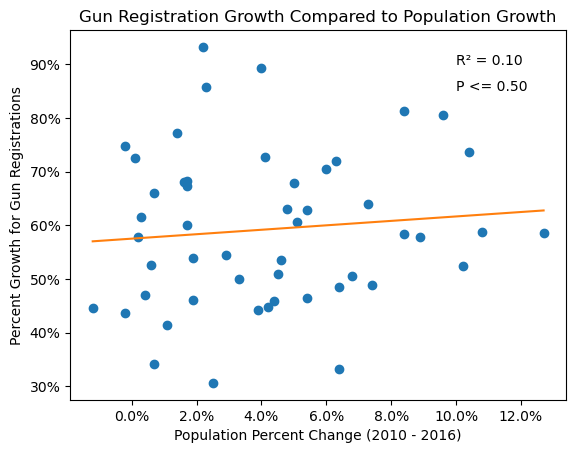

In [95]:
#Sort values in the ['Population, percent change..'] column
df_join_sorted.sort_values('Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Define tick spaces
fig, ax = plt.subplots(1,1)
#Change x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.1, 0.9, 'R\u00B2 = %0.2f' % result_pop_growth.rvalue)
plt.text(0.1, 0.85, 'P <= %0.2f' % result_pop_growth.pvalue)
plt.xlabel("Population Percent Change (2010 - 2016)")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to Population Growth")

plt.show()

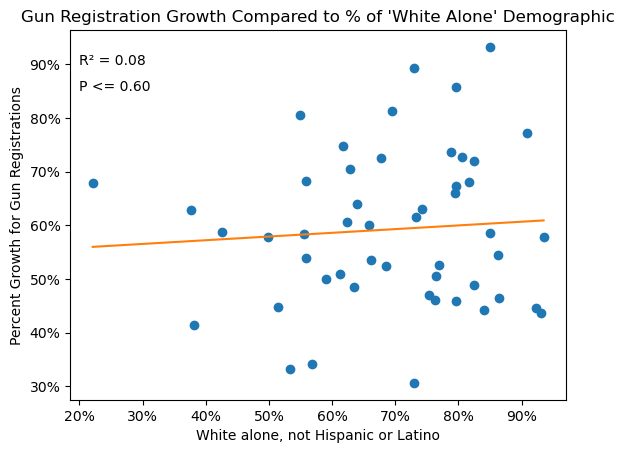

In [96]:
#Sorted values in the ['White alone, not Hispanic or Latino...'] columns
df_join_sorted.sort_values('White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Define tick spaces
fig, ax = plt.subplots(1,1)

#Change x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.2, 0.9, 'R\u00B2 = %0.2f' % result_white.rvalue)
plt.text(0.2, 0.85, 'P <= %0.2f' % result_white.pvalue)
plt.xlabel("White alone, not Hispanic or Latino")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to % of 'White Alone' Demographic")

plt.show()

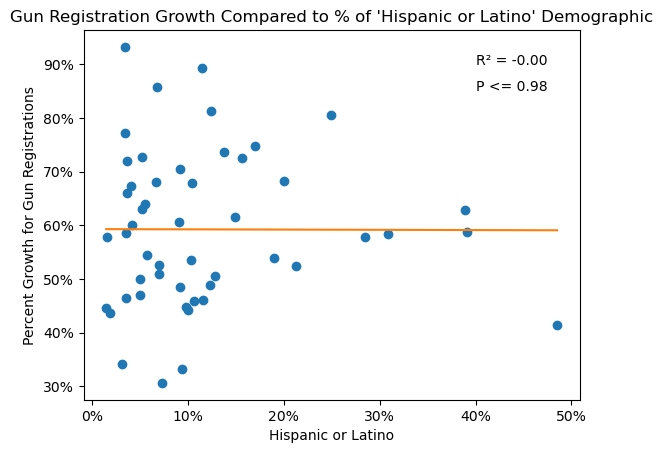

In [97]:
#Sorted values in the ['Hispanic or Latino...'] columns
df_join_sorted.sort_values('Hispanic or Latino, percent, July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['Hispanic or Latino, percent, July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Defined tick spaces
fig, ax = plt.subplots(1,1)

#Changed x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.4, 0.9, 'R\u00B2 = %0.2f' % result_hispanic.rvalue)
plt.text(0.4, 0.85, 'P <= %0.2f' % result_hispanic.pvalue)
plt.xlabel("Hispanic or Latino")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to % of 'Hispanic or Latino' Demographic")

plt.show()

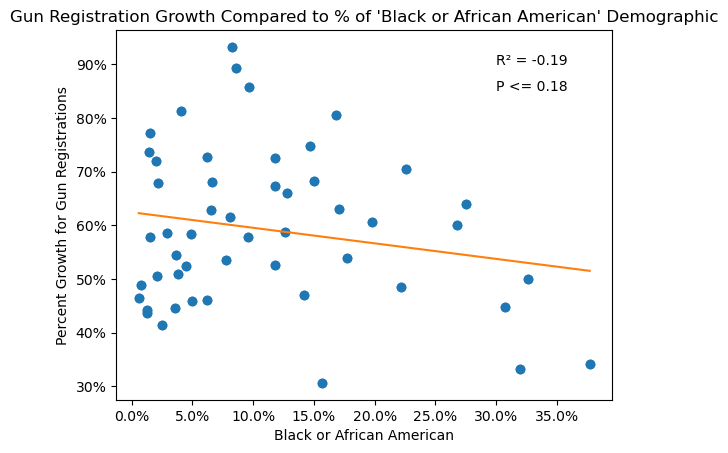

In [98]:
#Sorted values in the ['Black or African American alone ...'] columns
df_join_sorted.sort_values('Black or African American alone, percent, July 1, 2016,  (V2016)', ascending = True, inplace= True)

x = df_join_sorted['Black or African American alone, percent, July 1, 2016,  (V2016)']
y = df_join_sorted['percentage']

#Defined tick spaces
fig, ax = plt.subplots(1,1)
plt.scatter(df_join_sorted['Black or African American alone, percent, July 1, 2016,  (V2016)'],df_join_sorted['percentage'])

#Changed x and y axis to include percentage signs
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1.0))

#Create linear regression line
plt.plot(x, y, 'o')

m, b= np.polyfit(x, y, 1)

plt.plot(x, m*x+b)

#Labels for Scatter Plot
plt.text(0.3, 0.9, 'R\u00B2 = %0.2f' % result_black.rvalue)
plt.text(0.3, 0.85, 'P <= %0.2f' % result_black.pvalue)
plt.xlabel("Black or African American")
plt.ylabel("Percent Growth for Gun Registrations")
plt.title("Gun Registration Growth Compared to % of 'Black or African American' Demographic")

plt.show()